In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data

https://www.tensorflow.org/get_started/mnist/beginners 에서 MNIST 데이터셋의 정보를 볼 수 있다.

In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


위의 코드에서 UnicodeEncodeError가 발생하면 http://imsjhong.blogspot.kr/2017/07/tensorflow-3.html 를 참고

In [3]:
nb_classes = 10

# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784])
# 0 - 9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

In [4]:
# Hypothesis (using softmax)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Test model
is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [5]:
# parameters
training_epochs = 150
batch_size = 100

sess = tf.Session()
# Initialize TensorFlow variables
sess.run(tf.global_variables_initializer())
# Training cycle
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
        
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        c, _ = sess.run([cost, optimizer], feed_dict={X: batch_xs, Y: batch_ys})
        avg_cost += c / total_batch
    if epoch % 5 == 0:    
        print('Epoch:', '%04d' % (epoch +1), 'cost =', '{:.9f}'.format(avg_cost))
    # Test the model using test sets
print("Accuracy: ", accuracy.eval(session=sess,
                                    feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

Epoch: 0001 cost = 2.828889277
Epoch: 0006 cost = 0.637568454
Epoch: 0011 cost = 0.513115213
Epoch: 0016 cost = 0.454408005
Epoch: 0021 cost = 0.417756679
Epoch: 0026 cost = 0.391003192
Epoch: 0031 cost = 0.371290085
Epoch: 0036 cost = 0.356074184
Epoch: 0041 cost = 0.343018484
Epoch: 0046 cost = 0.332766158
Epoch: 0051 cost = 0.323727757
Epoch: 0056 cost = 0.316406820
Epoch: 0061 cost = 0.309691281
Epoch: 0066 cost = 0.304090624
Epoch: 0071 cost = 0.298969434
Epoch: 0076 cost = 0.294498510
Epoch: 0081 cost = 0.290314861
Epoch: 0086 cost = 0.286981011
Epoch: 0091 cost = 0.283566763
Epoch: 0096 cost = 0.280805618
Epoch: 0101 cost = 0.277939062
Epoch: 0106 cost = 0.275584380
Epoch: 0111 cost = 0.273135142
Epoch: 0116 cost = 0.271171293
Epoch: 0121 cost = 0.269328187
Epoch: 0126 cost = 0.267312727
Epoch: 0131 cost = 0.265730756
Epoch: 0136 cost = 0.264149985
Epoch: 0141 cost = 0.262554469
Epoch: 0146 cost = 0.261185058
Accuracy:  0.918


In [6]:
import matplotlib.pyplot as plt
import random

Label: [9]
Prediction: [9]


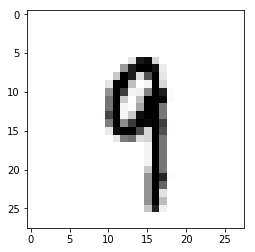

In [7]:
# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label:", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction:", sess.run(tf.argmax(hypothesis, 1),
                             feed_dict={X: mnist.test.images[r:r + 1]}))
plt.imshow(mnist.test.images[r:r + 1].
          reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()